## Linear Regression  
It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we establish relationship between independent and dependent variables by fitting a best line. This best fit line is known as regression line and represented by a linear equation `Y = m*X + b`. These symbol of these values can varry, cuz many people write it in different way like some represent the `intercept` with `c` or `w` etc.

> 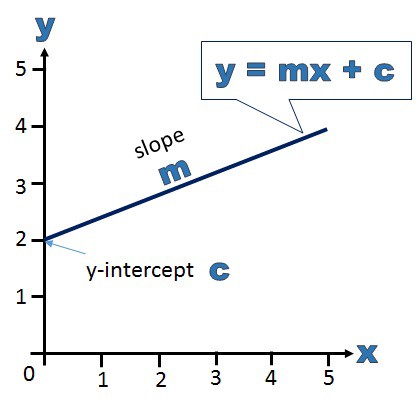 <br>

In this equation:
* Y – Dependent Variable
* m – Slope
* X – Independent variable
* b – Intercept

> These coefficients `m` and `b` are derived based on minimizing the sum of squared difference of distance between data points and regression line.

### Steps to find best fit line
First we plot a random line and measure the total error value, which can be calculated by different loss function for example in `MSE` we calculate the loss of each point (Actual - Predicted), square it and then take average of it. And then we try to reduce these error as much as possible by trying different best-fit line. <br>

> 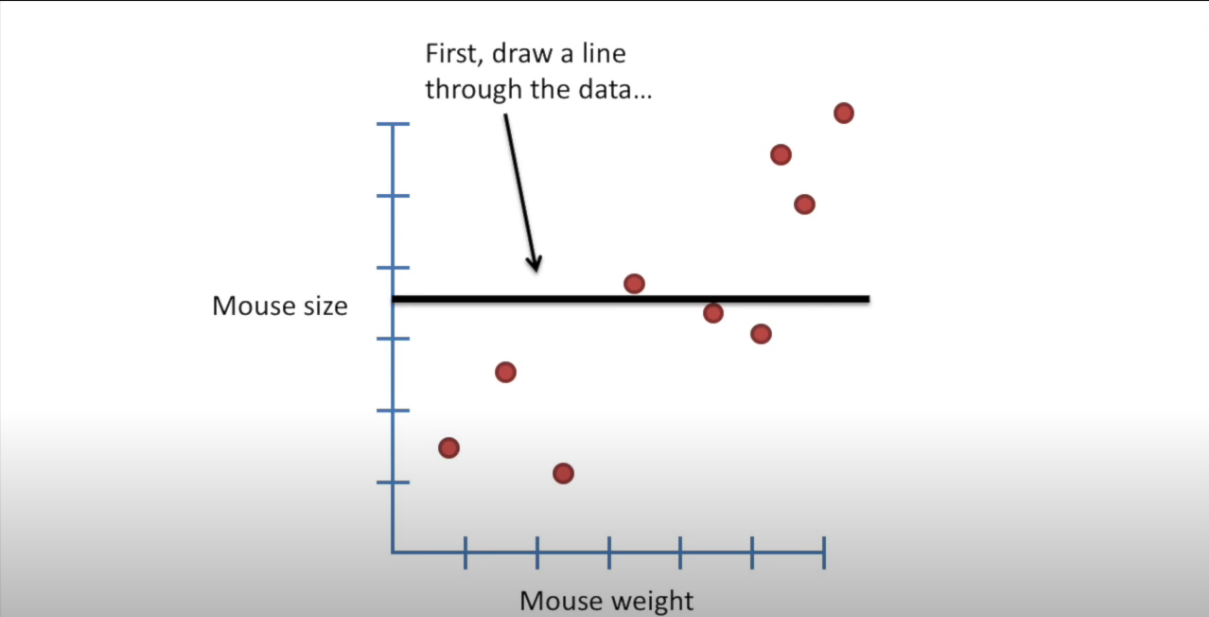
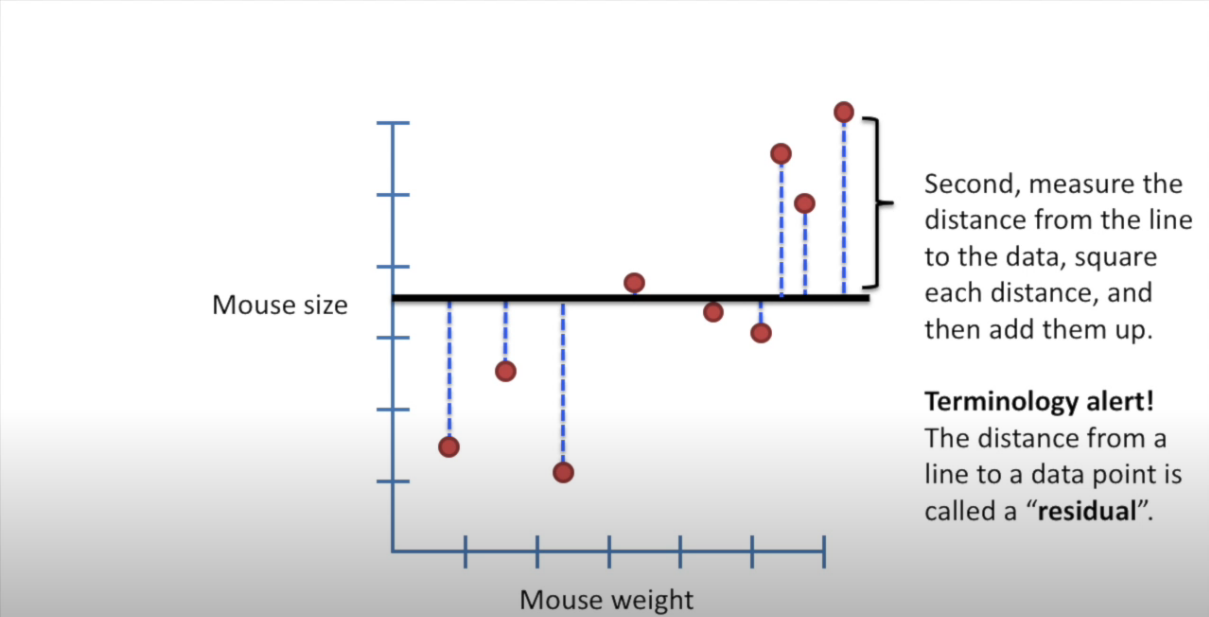 
<br>Try more lines<br>
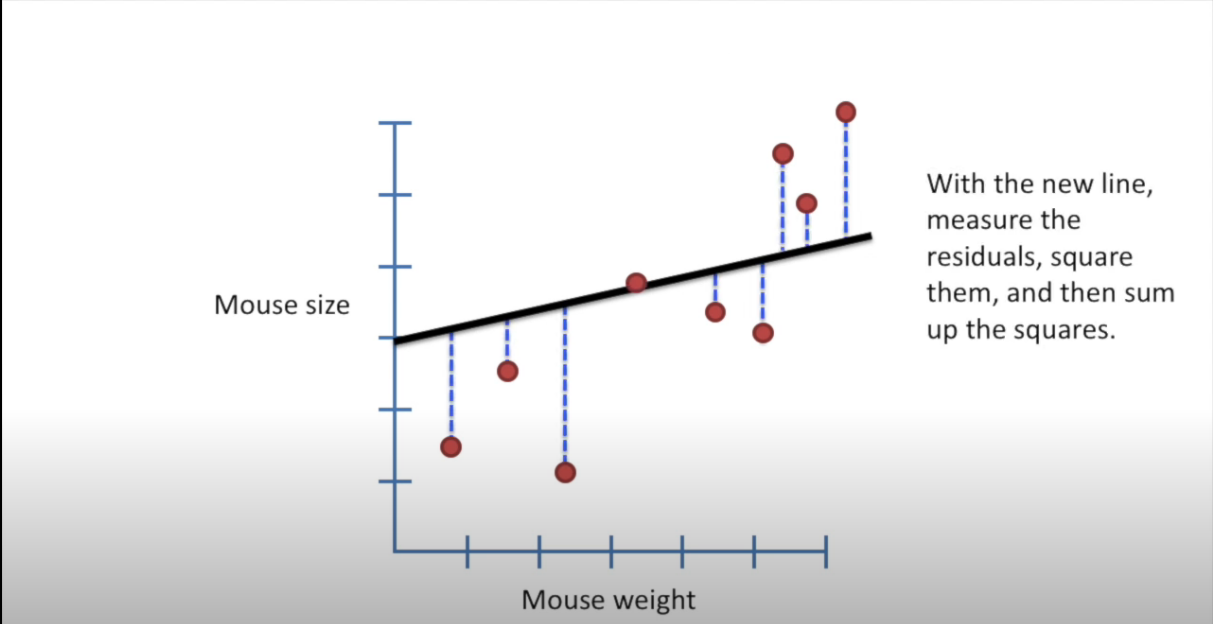
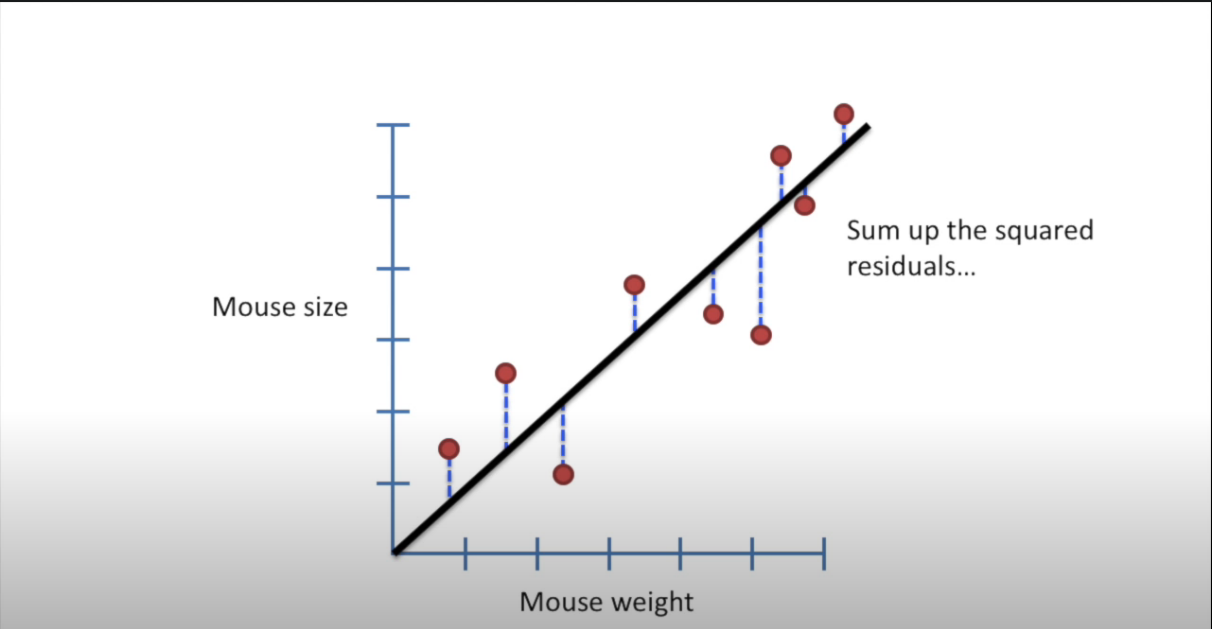
<br>After that plot this residuals and find the line with least residuals<br>
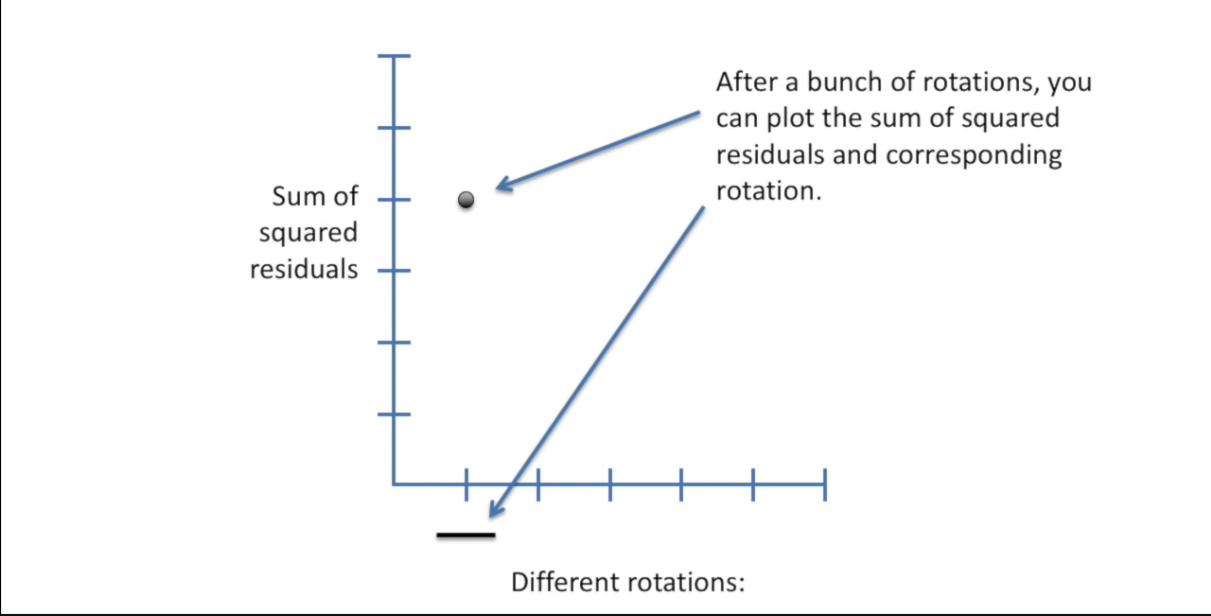
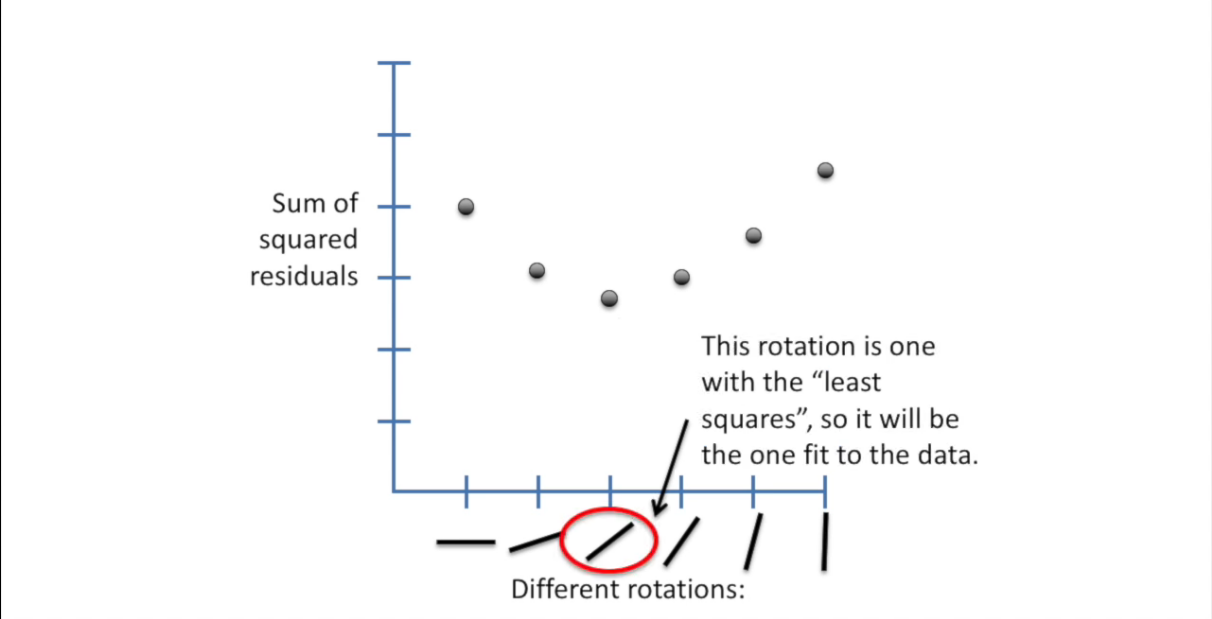
<br>Now the line with least residual is our best-fit line<br>
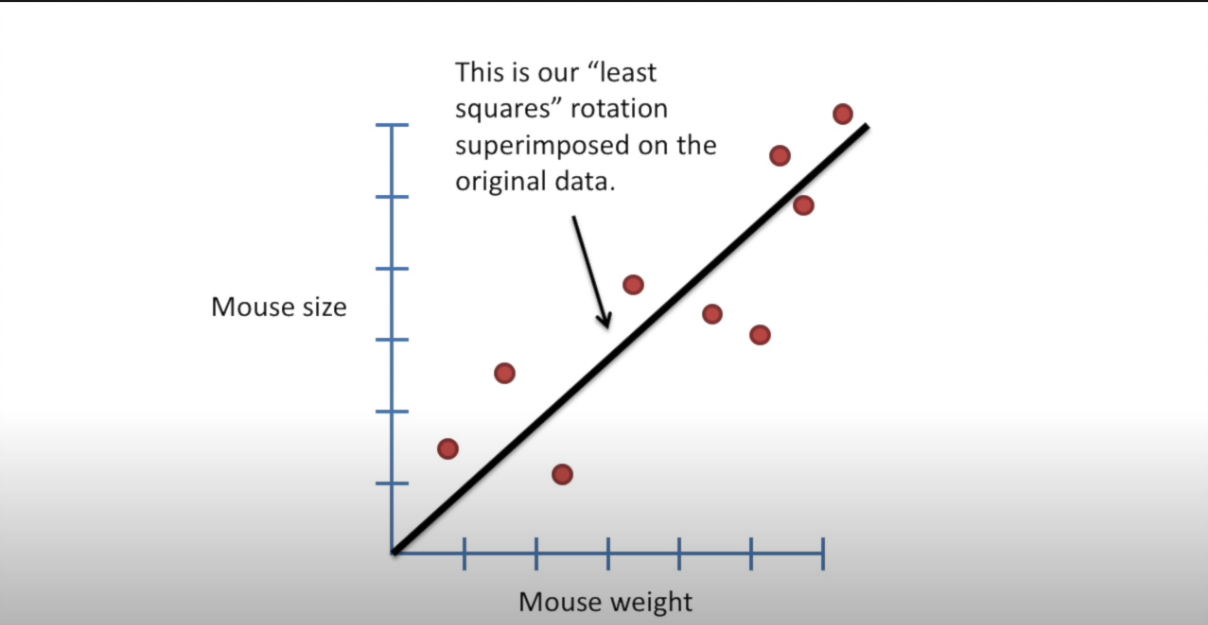
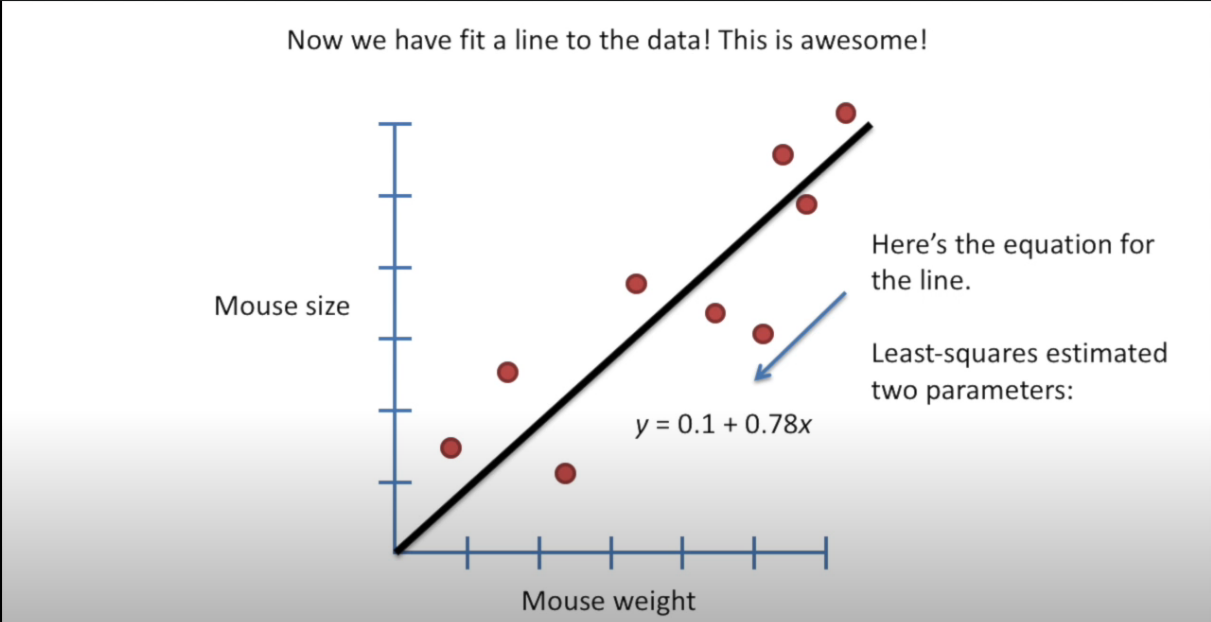

### Building Linear Regression Model

In [2]:
# importing requirements
import pandas as pd # <---- for handling tabular data
from sklearn.linear_model import LinearRegression # <--- for building linear regression model
from sklearn.model_selection import train_test_split # <----- for splitting data
from sklearn.metrics import mean_squared_error # <----- for calculating error

In [3]:
# reading dataset
df = pd.read_csv('Ads Budget and Sales.csv')
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


#### Here we want to predict sales of a product so it will be our label and rest will be our features

In [5]:
# seperating feature and labels
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

print(features.shape)
print(label.shape)

(200, 3)
(200,)


In [8]:
# splitting data into train and test for training and testing
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=21)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(160, 3) (160,) (40, 3) (40,)


In [10]:
# creating model 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
print(model.coef_, model.intercept_)

[ 0.04621061  0.19146787 -0.00164059] 2.74926644189099


so the coefficient of all three features are `[ 0.04621061  0.19146787 -0.00164059]` and intercept of the model is `2.74926644189099`

In [14]:
# now let's predict our test data 
y_predict = model.predict(x_test)

In [18]:
y_test[:10]

144    11.4
9      10.6
17     24.4
20     18.0
45     14.9
6      11.8
52     22.6
91      7.3
129     9.7
183    26.2
Name: Sales ($), dtype: float64

In [22]:
y_predict[:10]

array([ 9.964633  , 12.44518303, 23.24351584, 18.05771695, 15.09709338,
       11.64796897, 20.66848603,  4.30395233,  7.73032402, 24.15476296])

In [23]:
# now let's see what is the final error value we get
mean_squared_error(y_test, y_predict)

2.759364453171165

As we can see the error value is preety low

In [24]:
# we can also check other metrics
from sklearn.metrics import r2_score, mean_absolute_error
print(mean_absolute_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

1.3507390587321353
0.922073740849386
